In [24]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
df = pd.read_pickle("./ovechkin.pkl")
df.head()

,date,opponent,goals,assists,points,plusMinus,powerPlayGoals,powerPlayPoints,powerPlayTimeOnIce,shortHandedGoals,gameWinningGoals,overTimeGoals,shots,penaltyMinutes,shifts,timeOnIce,isHome,isWin,isOT,season
2005020004,2005-10-05,Columbus Blue Jackets,2,0,2,1,1,1,06:18,0,0,0,5,2,21,17:36,True,True,False,20052006
2005020020,2005-10-07,Atlanta Thrashers,0,1,1,-2,0,1,07:14,0,0,0,1,0,22,17:44,True,False,False,20052006
2005020029,2005-10-08,Atlanta Thrashers,0,1,1,0,0,1,07:30,0,0,0,3,4,21,16:21,False,False,False,20052006
2005020042,2005-10-10,New York Rangers,1,0,1,1,1,1,04:32,0,1,0,6,2,18,15:03,True,True,False,20052006
2005020054,2005-10-12,Carolina Hurricanes,1,0,1,0,0,0,04:32,0,0,0,6,0,17,13:53,False,False,False,20052006


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 2005020004 to 2022020622
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1316 non-null   datetime64[ns]
 1   opponent            1316 non-null   object        
 2   goals               1316 non-null   object        
 3   assists             1316 non-null   object        
 4   points              1316 non-null   object        
 5   plusMinus           1316 non-null   object        
 6   powerPlayGoals      1316 non-null   object        
 7   powerPlayPoints     1316 non-null   object        
 8   powerPlayTimeOnIce  1316 non-null   object        
 9   shortHandedGoals    1316 non-null   object        
 10  gameWinningGoals    1316 non-null   object        
 11  overTimeGoals       1316 non-null   object        
 12  shots               1316 non-null   object        
 13  penaltyMinutes      1316 non-null

In [4]:
df.overTimeGoals.value_counts()

0    1291
1      25
Name: overTimeGoals, dtype: int64

## Приводим значения к нормальным типам

0   date                datetime64[ns]

1   opponent            object Навзание команды соперника - строка, так и оставим   
2   goals               object Количество голов, приведем к типу int   
3   assists             object Количество ассистов, приведем к типу int       
4   points              object Количество очков, приведем к типу int       
5   plusMinus           object Значение полезности, приведем к типу int       
6   powerPlayGoals      object Количество голов в большинстве, приведем к типу int       
7   powerPlayPoints     object Количество очков в большинстве, приведем к типу int       
8   powerPlayTimeOnIce  object Количество минут в большинстве, приведем к секундам, типу int/float
9   shortHandedGoals    object Количество голов в меньшинстве, приведем к типу int       
10  gameWinningGoals    object Был ли гол победным? приведем к типу Bool       
11  overTimeGoals       object Был ли гол забит в овертайме? приведем к типу Bool        
12  shots               object Количество бросков, приведем к типу int       
13  penaltyMinutes      object Количество штрафных минут, приведем к типу int      
14  shifts              object Количество смен, приведем к типу int        
15  timeOnIce           object Время на льду, приведем к секундам, типу int/float       
16  isHome              bool      
17  isWin               bool          
18  isOT                bool          
19  season 

In [5]:
features = ['date', 'shots', 'powerPlayTimeOnIce', 'penaltyMinutes', 'shifts', 'timeOnIce','isHome','isOT','isWin','opponent']

In [6]:
df.goals = df.goals.astype(int)
df.assists = df.assists.astype(int)
df.points = df.points.astype(int)
df.plusMinus = df.plusMinus.astype(int)
df.powerPlayGoals = df.powerPlayGoals.astype(int)
df.powerPlayPoints = df.powerPlayPoints.astype(int)
df.shortHandedGoals = df.shortHandedGoals.astype(int)
df.shots = df.shots.astype(int)
df.shifts = df.shifts.astype(int)
df.penaltyMinutes = df.penaltyMinutes.astype(int)

In [7]:
df.timeOnIce = df.timeOnIce.apply(lambda x: ((datetime.strptime(x, '%M:%S')-datetime(1900,1,1)).total_seconds()))
df.powerPlayTimeOnIce = df.powerPlayTimeOnIce.apply(lambda x: ((datetime.strptime(x, '%M:%S')-datetime(1900,1,1)).total_seconds()))

In [8]:
# Пока не определился, нужен нам Bool или 1/0
#df.overTimeGoals = df.overTimeGoals.astype(bool)
#df.gameWinningGoals = df.gameWinningGoals.astype(bool)

In [9]:
df.head()

,date,opponent,goals,assists,points,plusMinus,powerPlayGoals,powerPlayPoints,powerPlayTimeOnIce,shortHandedGoals,gameWinningGoals,overTimeGoals,shots,penaltyMinutes,shifts,timeOnIce,isHome,isWin,isOT,season
2005020004,2005-10-05,Columbus Blue Jackets,2,0,2,1,1,1,378.0,0,0,0,5,2,21,1056.0,True,True,False,20052006
2005020020,2005-10-07,Atlanta Thrashers,0,1,1,-2,0,1,434.0,0,0,0,1,0,22,1064.0,True,False,False,20052006
2005020029,2005-10-08,Atlanta Thrashers,0,1,1,0,0,1,450.0,0,0,0,3,4,21,981.0,False,False,False,20052006
2005020042,2005-10-10,New York Rangers,1,0,1,1,1,1,272.0,0,1,0,6,2,18,903.0,True,True,False,20052006
2005020054,2005-10-12,Carolina Hurricanes,1,0,1,0,0,0,272.0,0,0,0,6,0,17,833.0,False,False,False,20052006


### Построим графики распределения для каждого столбца, чтобы оценить их форму и распределение.

C:\Users\Anshef\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='goals', ylabel='Density'>

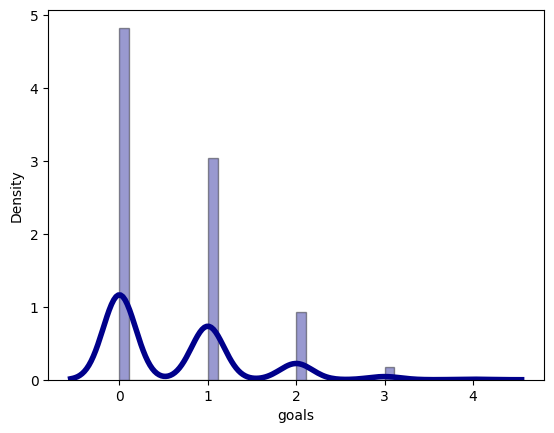

In [10]:
sns.distplot(df.goals, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\Anshef\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='goals', ylabel='Density'>

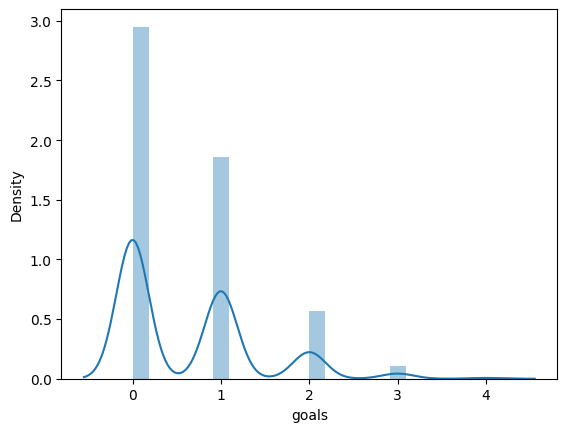

In [11]:
sns.distplot(df.goals, hist=True, kde=True,)

<Axes: xlabel='goals', ylabel='Density'>

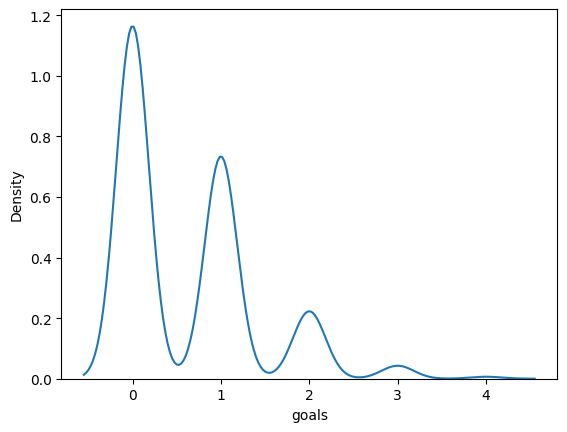

In [12]:
sns.kdeplot(df.goals)

<Axes: ylabel='goals'>

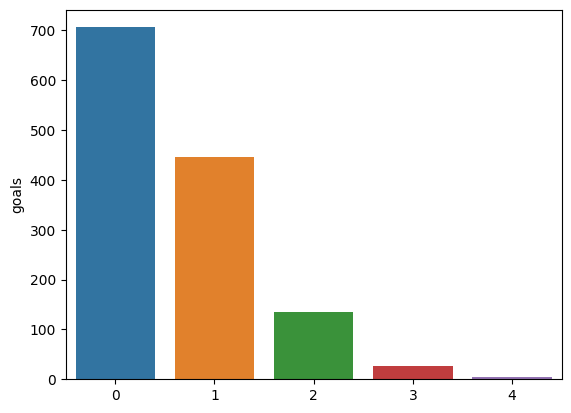

In [13]:
plt = sns.barplot(x=df['goals'].value_counts().index, y=df['goals'].value_counts())
plt

In [14]:
df[f'{df.columns[1]}']

2005020004    Columbus Blue Jackets
2005020020        Atlanta Thrashers
2005020029        Atlanta Thrashers
2005020042         New York Rangers
2005020054      Carolina Hurricanes
                      ...          
2022020566          Ottawa Senators
2022020580       Montréal Canadiens
2022020599           Buffalo Sabres
2022020617    Columbus Blue Jackets
2022020622      Nashville Predators
Name: opponent, Length: 1316, dtype: object

In [15]:
df.columns

Index(['date', 'opponent', 'goals', 'assists', 'points', 'plusMinus',
       'powerPlayGoals', 'powerPlayPoints', 'powerPlayTimeOnIce',
       'shortHandedGoals', 'gameWinningGoals', 'overTimeGoals', 'shots',
       'penaltyMinutes', 'shifts', 'timeOnIce', 'isHome', 'isWin', 'isOT',
       'season'],
      dtype='object')

In [16]:
len(df.columns)

20

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 2005020004 to 2022020622
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1316 non-null   datetime64[ns]
 1   opponent            1316 non-null   object        
 2   goals               1316 non-null   int32         
 3   assists             1316 non-null   int32         
 4   points              1316 non-null   int32         
 5   plusMinus           1316 non-null   int32         
 6   powerPlayGoals      1316 non-null   int32         
 7   powerPlayPoints     1316 non-null   int32         
 8   powerPlayTimeOnIce  1316 non-null   float64       
 9   shortHandedGoals    1316 non-null   int32         
 10  gameWinningGoals    1316 non-null   object        
 11  overTimeGoals       1316 non-null   object        
 12  shots               1316 non-null   int32         
 13  penaltyMinutes      1316 non-null

In [18]:
num_cols = ['goals', 'assists', 'points', 'plusMinus', 'powerPlayGoals', 'powerPlayPoints', 'gameWinningGoals', 'overTimeGoals', 'shots', 'penaltyMinutes', 'shifts', 'timeOnIce']

In [19]:
len(num_cols)

12

<Axes: xlabel='goals', ylabel='Density'>

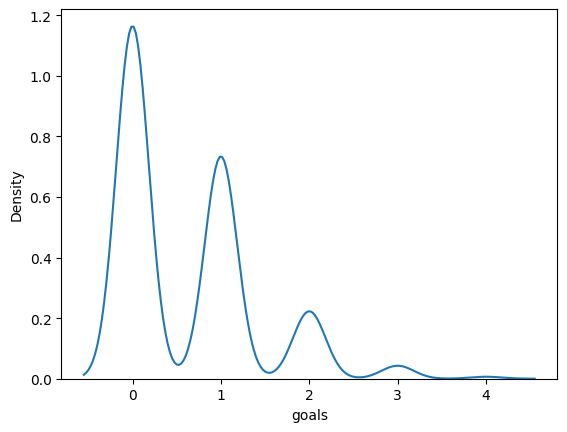

In [20]:
sns.kdeplot(df[f'{df.columns[2]}'])

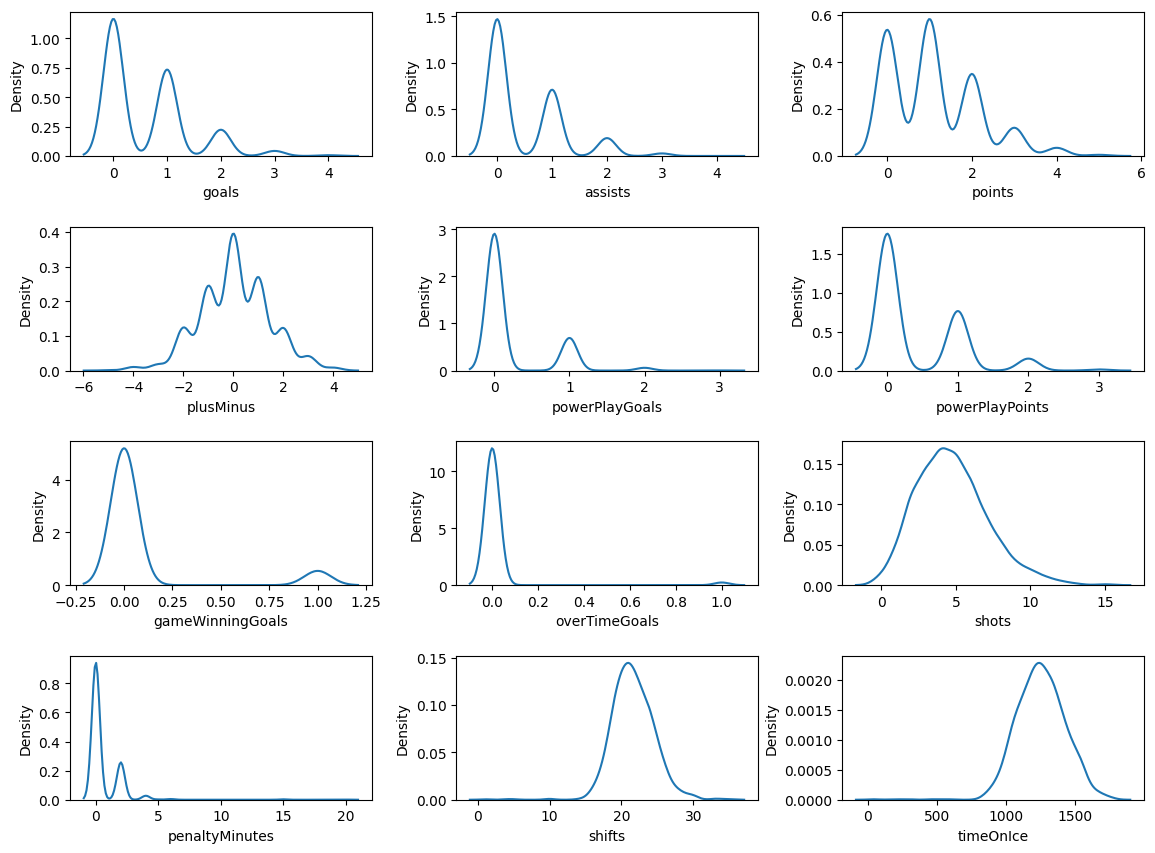

In [25]:
fig, axs = plt.subplots(nrows=4, ncols=3,  figsize=(12, 9))
fig.tight_layout(pad=3.0)
k=0
for i in range(4):
    for j in range(3):
        sns.kdeplot(df[num_cols[k]], ax=axs[i,j])
        k+=1

### 	Проанализируем гистограммы для каждого столбца, чтобы определить, какие значения наиболее часто встречаются

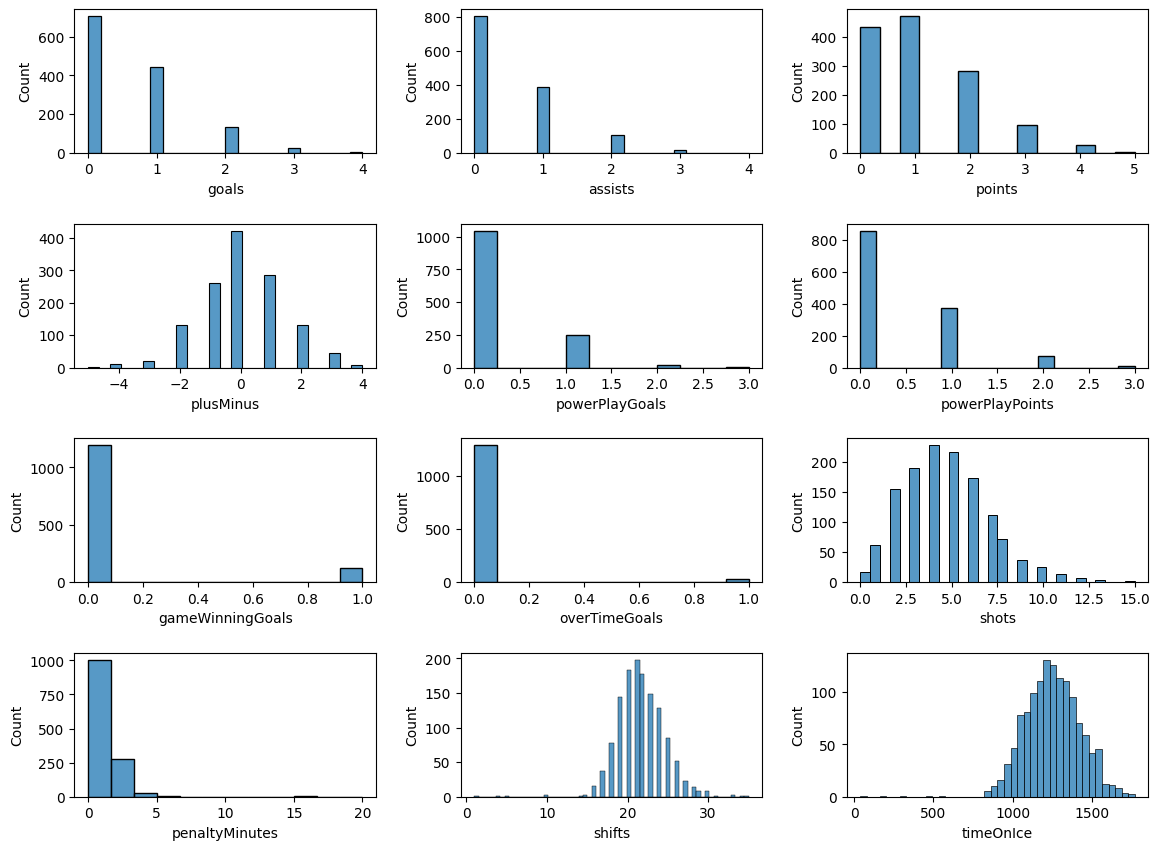

In [26]:
fig, axs = plt.subplots(nrows=4, ncols=3,  figsize=(12, 9))
fig.tight_layout(pad=3.0)
k=0
for i in range(4):
    for j in range(3):
        sns.histplot(df[num_cols[k]], ax=axs[i,j])
        k+=1

### Оценим количество голов и ассистов за каждый сезон. Можно проанализировать среднее количество голов и ассистов, а также стандартное отклонение. Это позволит определить, насколько постоянна производительность Овечкина в каждом сезоне.

In [29]:
goals_by_seasons = df.groupby('season')['goals'].sum()
assists_by_seasons = df.groupby('season')['assists'].sum()

In [58]:
goals_std = goals_by_seasons.std()
assists_std = assists_by_seasons.std()

C:\Users\Anshef\AppData\Local\Temp\ipykernel_5644\3302694469.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45);


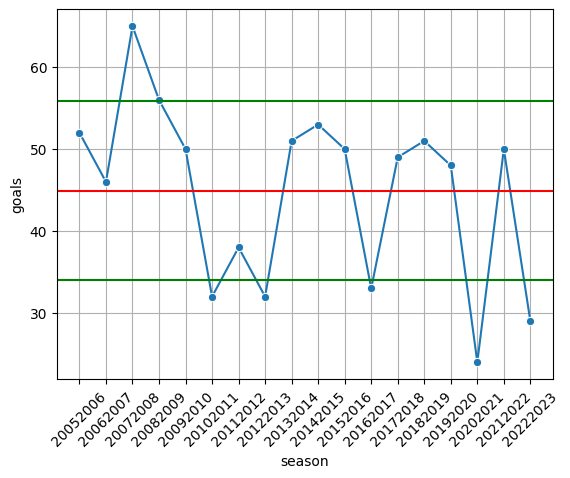

In [59]:
g = sns.lineplot(x=goals_by_seasons.index, y=goals_by_seasons, marker='o');
g.axhline(goals_by_seasons.mean(), color = 'r')
g.axhline(goals_by_seasons.mean()+goals_std, color = 'g')
g.axhline(goals_by_seasons.mean()-goals_std, color = 'g')
plt.grid()
g.set_xticklabels(g.get_xticklabels(), rotation=45);

C:\Users\Anshef\AppData\Local\Temp\ipykernel_5644\412567545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45);


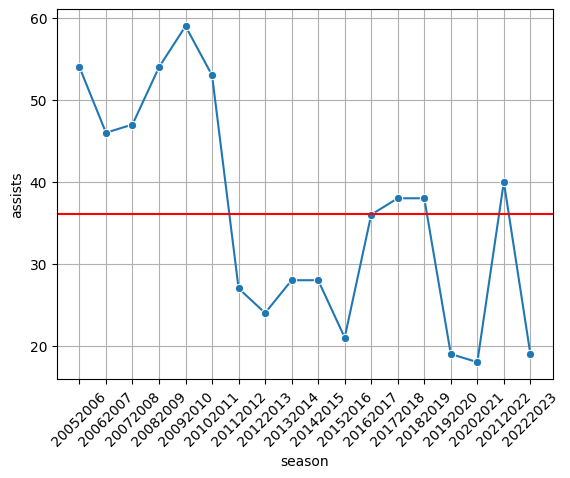

In [55]:
g = sns.lineplot(x=assists_by_seasons.index, y=assists_by_seasons, marker='o');
g.axhline(assists_by_seasons.mean(), color = 'r')
plt.grid()
g.set_xticklabels(g.get_xticklabels(), rotation=45);